In [1]:
import numpy as np
import subprocess
import random

In [74]:
config ={
  "trace_interval": 0.2,
  "scheduler": "DPP",
  "time_samples": 3,
  "ues": [
    {
      "id": 1,
      "fiveqi": "GBR_GAMING",
      "traffic_mbps": [8e+06,5e+06,3e+06,5e+06],
      "gfbr_mbps":  [8e+06,5e+06,3e+06,5e+06]
    },
    {
      "id": 2,
      "fiveqi": "GBR_GAMING",
      "traffic_mbps": [8e+06],
      "gfbr_mbps":  [8e+06]
    },
     {
      "id": 3,
      "fiveqi": "GBR_GAMING",
      "traffic_mbps": [8e+06],
      "gfbr_mbps": [8e+06]
    },
    {
      "id": 4,
      "fiveqi": "GBR_GAMING",
      "traffic_mbps": [8e+06],
      "gfbr_mbps": [8e+06]
    }
   
  ]
}

In [75]:
import json
import subprocess

CONFIG_FILE = "scenario_config_4UE_constant.json"

# ===============================
# LOAD CONFIG
# ===============================

# with open(CONFIG_FILE, "r") as f:
#     config = json.load(f)

TRACE_INTERVAL = config["trace_interval"]
SCHEDULER = config["scheduler"]
TIME_SAMPLES = config["time_samples"]

ues = config["ues"]
NUM_UES = len(ues)

traffic_profiles = []
gbr_profiles = []
fiveqi_profiles = []

for ue in ues:
    # traffic = [x *1e6  for x in ue["traffic_mbps"]]  # convert Mbps → bps
    # gfbr = [x *1e6  for x in ue["gfbr_mbps"]]        # convert Mbps → bps

    traffic = [x   for x in ue["traffic_mbps"]]  # convert Mbps → bps
    gfbr = [x   for x in ue["gfbr_mbps"]]        # convert Mbps → bps

    traffic_profiles.append(",".join(f"{x:.0f}" for x in traffic))
    gbr_profiles.append(",".join(f"{x:.0f}" for x in gfbr))
    fiveqi_profiles.append(ue["fiveqi"])

traffic_str = "|".join(traffic_profiles)
gbr_str = "|".join(gbr_profiles)
fiveqi_str = "|".join(fiveqi_profiles)

# ===============================
# PRINT CONFIG SUMMARY
# ===============================

print("Launching simulation with:")
print(f"  UEs: {NUM_UES}")
print(f"  Scheduler: {SCHEDULER}")
print(f"  Trace interval: {TRACE_INTERVAL}s")
print()

for ue in ues:
    print(f"  UE {ue['id']}:")
    print(f"    5QI: {ue['fiveqi']}")
    print(f"    Traffic: {ue['traffic_mbps']} bps")
    print(f"    GFBR: {ue['gfbr_mbps']} bps")
    print()

# ===============================
# NS-3 RUN
# ===============================

# cmd = [
#     "./ns3", "run",
#     f"cttc-nr-traffic-3gpp-xr-qos-sched_sergi "
#     f"--trafficProfile={traffic_str} "
#     f"--gbrProfile={gbr_str} "
#     f"--fiveQiProfiles={fiveqi_str} "
#     f"--traceInterval={TRACE_INTERVAL} "
#     f"--schedulerType={SCHEDULER} "
#     f"--enableOfdma=true "
#     f"--vrUeNum={NUM_UES} "
#     f"--arUeNum=0 "
#     f"--cgUeNum=0"
# ]

# subprocess.run(cmd)

Launching simulation with:
  UEs: 4
  Scheduler: DPP
  Trace interval: 0.2s

  UE 1:
    5QI: GBR_GAMING
    Traffic: [8000000.0, 5000000.0, 3000000.0, 5000000.0] bps
    GFBR: [8000000.0, 5000000.0, 3000000.0, 5000000.0] bps

  UE 2:
    5QI: GBR_GAMING
    Traffic: [8000000.0] bps
    GFBR: [8000000.0] bps

  UE 3:
    5QI: GBR_GAMING
    Traffic: [8000000.0] bps
    GFBR: [8000000.0] bps

  UE 4:
    5QI: GBR_GAMING
    Traffic: [8000000.0] bps
    GFBR: [8000000.0] bps



In [60]:

# # ===============================
# # CONFIGURATION
# # ===============================

# NUM_UES = 8
# TIME_SAMPLES = 1        # number of update intervals
# TRACE_INTERVAL = 1.0       # seconds
# SCHEDULER = "DPP"

# # Allowed 5QI profiles (must match C++ mapping)
# AVAILABLE_5QI = [
#     "GBR_GAMING",
#     "NGBR_LOW_LAT_EMBB",
#     # "GBR_CONV_VIDEO"
# ]


# # ===============================
# # PROFILE GENERATION
# # ===============================

# def generate_profiles(num_ues, T):
#     traffic_profiles = []
#     gbr_profiles = []
#     fiveqi_profiles = []

#     for ue in range(num_ues):

#         # --- Generate traffic demand (Mbps)
#         demand = np.random.uniform(10, 10, T) *1e6
#         # demand = 5e6

#         # --- Generate forecast (GFBR)
#         # Example: forecast with slight bias + noise
#         # forecast = demand * np.random.uniform(0.9, 1.15)
#         forecast = demand * np.random.uniform(0.8, 0.8)
#         # forecast = 4e6

#         # --- Select 5QI per UE
#         fiveqi = random.choice(AVAILABLE_5QI)

#         if fiveqi == "GBR_GAMING" or fiveqi == "GBR_CONV_VIDEO":
#             # forecast = demand * np.random.uniform(0.9, 1.15)
#             forecast = demand * np.random.uniform(1, 1)
#         else:
#             forecast = np.zeros(T)  # NGBR has no guaranteed bitrate

#         # --- Convert to string format
#         traffic_profiles.append(",".join(f"{x:.2f}" for x in demand))
#         gbr_profiles.append(",".join(f"{x:.2f}" for x in forecast))
#         fiveqi_profiles.append(fiveqi)

#     return traffic_profiles, gbr_profiles, fiveqi_profiles


In [61]:
# traffic_profiles, gbr_profiles, fiveqi_profiles = \
#     generate_profiles(NUM_UES, TIME_SAMPLES)

# traffic_str = "|".join(traffic_profiles)
# gbr_str = "|".join(gbr_profiles)
# fiveqi_str = "|".join(fiveqi_profiles)

# print("Launching simulation with:")
# print(f"  UEs: {NUM_UES}")
# print(f"  Scheduler: {SCHEDULER}")
# print(f"  Trace interval: {TRACE_INTERVAL}s")
# print(f"  5QI per UE: {fiveqi_profiles}")
# print()

In [76]:
print("Launching simulation with:")
print(f"  UEs: {NUM_UES}")
print(f"  Scheduler: {SCHEDULER}")
print(f"  Trace interval: {TRACE_INTERVAL}s")
print(f"  5QI per UE: {fiveqi_profiles}")

Launching simulation with:
  UEs: 4
  Scheduler: DPP
  Trace interval: 0.2s
  5QI per UE: ['GBR_GAMING', 'GBR_GAMING', 'GBR_GAMING', 'GBR_GAMING']


In [77]:
traffic_str

'8000000,5000000,3000000,5000000|8000000|8000000|8000000'

In [78]:
gbr_str

'8000000,5000000,3000000,5000000|8000000|8000000|8000000'

In [86]:


# ===============================
# NS-3 LAUNCHER
# ===============================


   

cmd = [
    "./ns3", "run",
    f"cttc-nr-traffic-3gpp-xr-qos-sched_sergi --trafficProfile={traffic_str} --gbrProfile={gbr_str} --fiveQiProfiles={fiveqi_str} --traceInterval={TRACE_INTERVAL} --schedulerType={SCHEDULER} --enableOfdma=true --vrUeNum={NUM_UES}"
]

subprocess.run(cmd)






Consolidate compiler generated dependencies of target cttc-nr-traffic-3gpp-xr-qos-sched_sergi
Scheduler: ns3::NrMacSchedulerOfdmaDPP
[APP CREATED] UE index=0 ptr=0x561f4d3f86f0
[APP CREATED] UE index=1 ptr=0x561f4d3d5a60
[APP CREATED] UE index=2 ptr=0x561f4d3d7570
[APP CREATED] UE index=3 ptr=0x561f4d3e93d0
[CTX CREATED] UE 0 traffic[0]=8000000 ptr=0x561f4d3f86f0
[CTX CREATED] UE 1 traffic[0]=8000000 ptr=0x561f4d3d5a60
[CTX CREATED] UE 2 traffic[0]=8000000 ptr=0x561f4d3d7570
[CTX CREATED] UE 3 traffic[0]=8000000 ptr=0x561f4d3e93d0
videoPtrs size = 4
allVideoPtrs size = 4
trafficProfile size = 4
gbrProfile size = 4
[INITIAL SET] ptr=0x561f4d3f86f0 rate=8 Mbps
[INITIAL SET] ptr=0x561f4d3d5a60 rate=8 Mbps
[INITIAL SET] ptr=0x561f4d3d7570 rate=8 Mbps
[INITIAL SET] ptr=0x561f4d3e93d0 rate=8 Mbps
dynamicUes size = 4


[DPP STATE] Time 0.1005s | UE 4 | Throughput=5.592 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.1005s | UE 3 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.1005s | UE 2 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.1005s | UE 1 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.101s | UE 3 | Throughput=5.592 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.101s | UE 2 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.101s | UE 1 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.1015s | UE 2 | Throughput=5.592 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.1015s | UE 1 | Throughput=0 Mbps | GFBR=0 Mbps | g=0
[DPP STATE] Time 0.102s | UE 1 | Throughput=5.592 Mbps | GFBR=0 Mbps | g=0
[SCHED UPDATE] Time 0.4s | RNTI=4 | GFBR set to 8 Mbps
[SCHED UPDATE] Time 0.4s | RNTI=3 | GFBR set to 8 Mbps
[SCHED UPDATE] Time 0.4s | RNTI=2 | GFBR set to 8 Mbps
[SCHED UPDATE] Time 0.4s | RNTI=1 | GFBR set to 8 Mbps
[DPP STATE] Time 0.4005s | UE 4 | Throughput=0 M

PING 7.0.0.2 - 56 bytes of data; 84 bytes including ICMP and IPv4 headers.
PING 7.0.0.3 - 56 bytes of data; 84 bytes including ICMP and IPv4 headers.
PING 7.0.0.4 - 56 bytes of data; 84 bytes including ICMP and IPv4 headers.
PING 7.0.0.5 - 56 bytes of data; 84 bytes including ICMP and IPv4 headers.
64 bytes from 7.0.0.2: icmp_seq=0 ttl=63 time=8.064 ms
64 bytes from 7.0.0.3: icmp_seq=0 ttl=63 time=8.564 ms
64 bytes from 7.0.0.4: icmp_seq=0 ttl=63 time=9.028 ms
64 bytes from 7.0.0.5: icmp_seq=0 ttl=63 time=10.064 ms
[PERIODIC] Time 0.4 UE 4 index=0
UPDATE PTR: 0x561f4d3a2980
Time 0.4s → Traffic=8 Mbps, GFBR=8 Mbps
[PERIODIC] Time 0.4 UE 3 index=0
UPDATE PTR: 0x561f4d3807a0
Time 0.4s → Traffic=8 Mbps, GFBR=8 Mbps
[PERIODIC] Time 0.4 UE 2 index=0
UPDATE PTR: 0x561f4d39ba00
Time 0.4s → Traffic=8 Mbps, GFBR=8 Mbps
[PERIODIC] Time 0.4 UE 1 index=0
UPDATE PTR: 0x561f4d39c660
Time 0.4s → Traffic=8 Mbps, GFBR=8 Mbps


[DPP STATE] Time 0.483s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.484s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.4845s | UE 4 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.485s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.5005s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.502s | UE 4 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.502s | UE 1 | Throughput=0 Mbps | GFBR=8 Mbps | g=8e+06
[DPP STATE] Time 0.5025s | UE 3 | Throughput=0 Mbps | GFBR=8 Mbps | g=8e+06
[DPP STATE] Time 0.5025s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.503s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.5165s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.5175s | UE 4 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.5195s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | 


--- 7.0.0.2 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 300ms
rtt min/avg/max/mdev = 8/8/8/0 ms

--- 7.0.0.3 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 300ms
rtt min/avg/max/mdev = 8/8/8/0 ms

--- 7.0.0.4 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 300ms
rtt min/avg/max/mdev = 9/9/9/0 ms

--- 7.0.0.5 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 300ms
rtt min/avg/max/mdev = 10/10/10/0 ms
[PERIODIC] Time 0.6 UE 4 index=1
UPDATE PTR: 0x561f4d3a2980
Time 0.6s → Traffic=5 Mbps, GFBR=5 Mbps
[PERIODIC] Time 0.6 UE 3 index=1
[PERIODIC] Time 0.6 UE 2 index=1
[PERIODIC] Time 0.6 UE 1 index=1


[DPP STATE] Time 0.667s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.6675s | UE 4 | Throughput=0 Mbps | GFBR=5 Mbps | g=5e+06
[DPP STATE] Time 0.6675s | UE 1 | Throughput=176.992 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.668s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 0.6685s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.683s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.685s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.6855s | UE 4 | Throughput=0 Mbps | GFBR=5 Mbps | g=5e+06
[DPP STATE] Time 0.6855s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.686s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 0.6985s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.7005s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.7025s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps |

[PERIODIC] Time 0.8 UE 4 index=2
UPDATE PTR: 0x561f4d3a2980
Time 0.8s → Traffic=3 Mbps, GFBR=3 Mbps


[DPP STATE] Time 0.836s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.849s | UE 4 | Throughput=193.072 Mbps | GFBR=3 Mbps | g=0
[DPP STATE] Time 0.85s | UE 3 | Throughput=0 Mbps | GFBR=8 Mbps | g=8e+06
[DPP STATE] Time 0.85s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.8505s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.853s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.8655s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.8655s | UE 1 | Throughput=0 Mbps | GFBR=8 Mbps | g=8e+06
[DPP STATE] Time 0.866s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.8665s | UE 4 | Throughput=193.072 Mbps | GFBR=3 Mbps | g=0
[DPP STATE] Time 0.8705s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.882s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 0.8825s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0

[PERIODIC] Time 1 UE 4 index=3
UPDATE PTR: 0x561f4d3a2980
Time 1s → Traffic=5 Mbps, GFBR=5 Mbps


[DPP STATE] Time 1.023s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.0325s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.034s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.036s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.04s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.0485s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.051s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.052s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.056s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.0655s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.0675s | UE 4 | Throughput=176.992 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.069s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.0725s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps |

[PERIODIC] Time 1.2 UE 4 index=4


[DPP STATE] Time 1.2025s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.207s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2165s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2175s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.2195s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.223s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.232s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2335s | UE 4 | Throughput=176.992 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.235s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2385s | UE 2 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2485s | UE 3 | Throughput=193.072 Mbps | GFBR=8 Mbps | g=0
[DPP STATE] Time 1.2505s | UE 4 | Throughput=193.072 Mbps | GFBR=5 Mbps | g=0
[DPP STATE] Time 1.251s | UE 1 | Throughput=193.072 Mbps | GFBR=8 Mb

Flow 1 (1.0.0.2:49153 -> 7.0.0.2:1131) proto UDP
  Tx Packets: 600
  Tx Bytes:   6295545
  TxOffered:  5.03644 Mbps
  Rx Bytes:   6295545
  Throughput: 5.03817 Mbps
  Mean delay:  1.87268 ms
  Mean jitter:  0.22087 ms
  Rx Packets: 600
Flow 2 (1.0.0.2:49154 -> 7.0.0.3:1132) proto UDP
  Tx Packets: 602
  Tx Bytes:   10048128
  TxOffered:  8.0385 Mbps
  Rx Bytes:   10048128
  Throughput: 8.04811 Mbps
  Mean delay:  1.84695 ms
  Mean jitter:  0.208264 ms
  Rx Packets: 602
Flow 3 (1.0.0.2:49155 -> 7.0.0.4:1133) proto UDP
  Tx Packets: 599
  Tx Bytes:   9998440
  TxOffered:  7.99875 Mbps
  Rx Bytes:   9998440
  Throughput: 8.0003 Mbps
  Mean delay:  1.85936 ms
  Mean jitter:  0.196292 ms
  Rx Packets: 599
Flow 4 (1.0.0.2:49156 -> 7.0.0.5:1134) proto UDP
  Tx Packets: 600
  Tx Bytes:   10016732
  TxOffered:  8.01339 Mbps
  Rx Bytes:   10016732
  Throughput: 8.02417 Mbps
  Mean delay:  1.8522 ms
  Mean jitter:  0.193189 ms
  Rx Packets: 600


  Mean flow throughput: 7.27769Mbps 
  Mean flow d

CompletedProcess(args=['./ns3', 'run', 'cttc-nr-traffic-3gpp-xr-qos-sched_sergi --trafficProfile=8000000,5000000,3000000,5000000|8000000|8000000|8000000 --gbrProfile=8000000,5000000,3000000,5000000|8000000|8000000|8000000 --fiveQiProfiles=GBR_GAMING|GBR_GAMING|GBR_GAMING|GBR_GAMING --traceInterval=0.2 --schedulerType=DPP --enableOfdma=true --vrUeNum=4'], returncode=0)

In [87]:


import pandas as pd
import matplotlib.pyplot as plt

In [88]:

df = pd.read_csv("throughput_per_ue.csv")

In [89]:
df

,Time,UE0,UE1,UE2,UE3
0,0.2,0.00000,0.00000,0.00000,0.00000
1,0.4,0.00000,0.00000,0.00000,0.00000
2,0.6,7.99488,7.99044,7.99956,8.00644
3,0.8,5.00212,7.99832,8.01032,8.00312
4,1.0,3.16812,7.99940,8.00024,8.01332
...,...,...,...,...,...
56,11.4,0.00000,0.00000,0.00000,0.00000
57,11.6,0.00000,0.00000,0.00000,0.00000
58,11.8,0.00000,0.00000,0.00000,0.00000
59,12.0,0.00000,0.00000,0.00000,0.00000


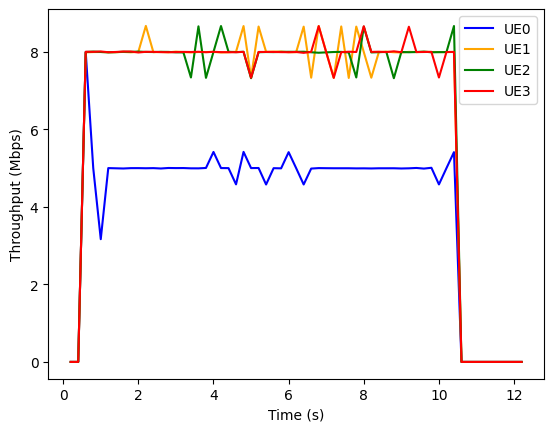

In [90]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']


df = pd.read_csv("throughput_per_ue.csv")

for i, col in enumerate(df.columns[1:]):
    plt.plot(df["Time"], df[col], label=col, color=colors[i])

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.show()

In [145]:
df.shape

(61, 9)

In [146]:
df_ue4 = df[["Time", "UE4"]]

In [147]:
df_ue4.mean()

Time    6.2
UE4     0.0
dtype: float64

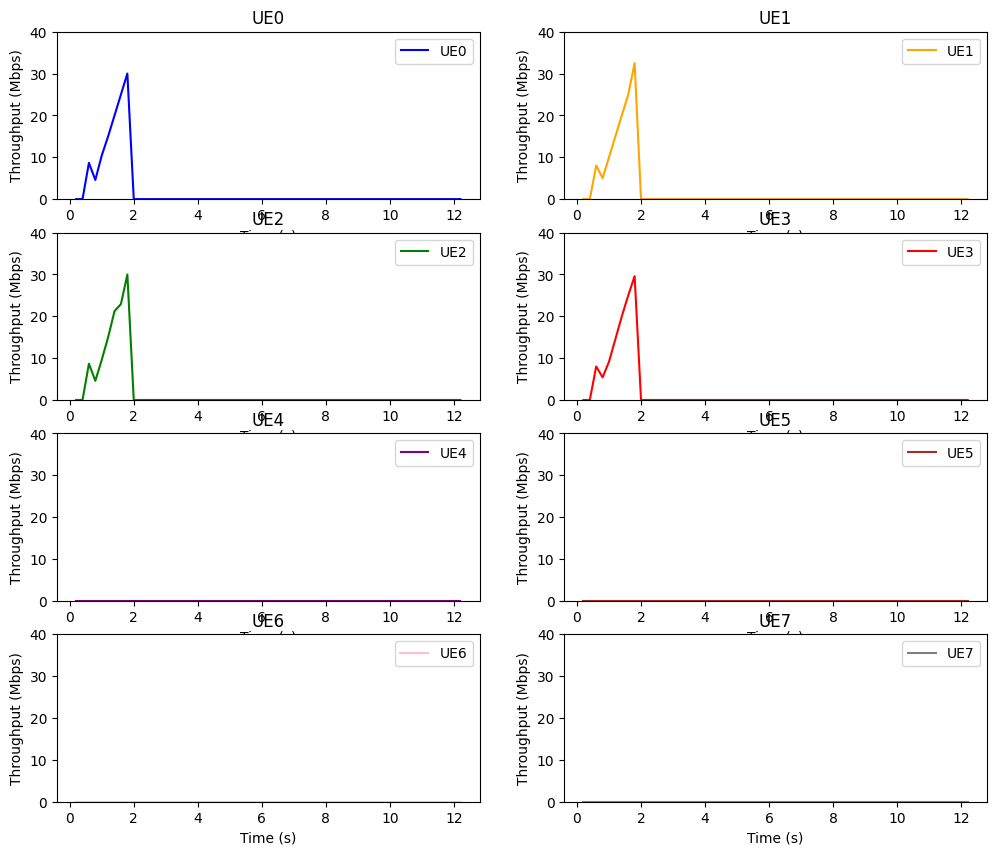

In [148]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("throughput_per_ue.csv")
fig, ax = plt.subplots(4, 2, figsize=(12, 10))
for i, col in enumerate(df.columns[1:]):
    # plt.figure()
    # plt.plot(df["Time"], df[col], label=col, color=colors[i])

    # plt.legend()
    # plt.xlabel("Time (s)")
    # plt.ylabel("Throughput (Mbps)")
    # plt.show()

    ax = ax.flatten()
    ax[i].plot(df["Time"], df[col], label=col, color=colors[i])
    ax[i].set_title(col)
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Throughput (Mbps)")
    ax[i].set_ylim(0,40)
    ax[i].legend()



In [14]:
df_rnti = df[df["RNTI"] == 7]

KeyError: 'RNTI'

In [15]:
df_rnti

NameError: name 'df_rnti' is not defined

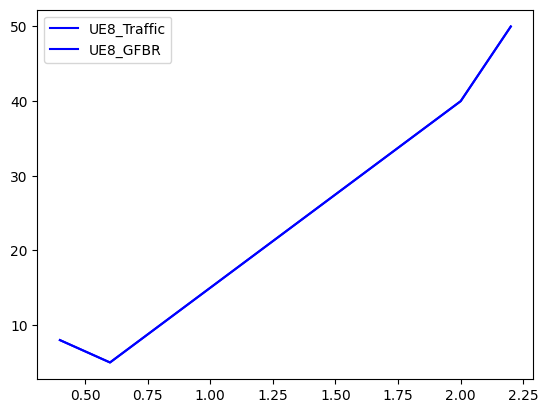

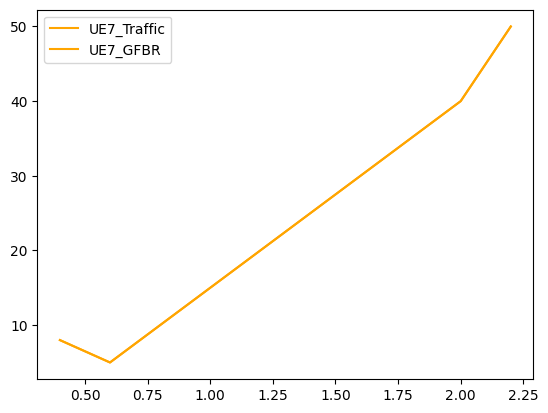

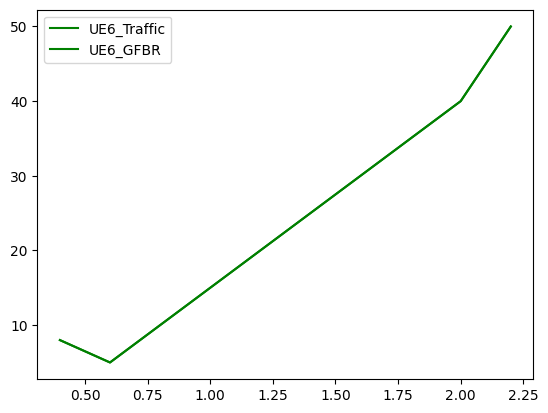

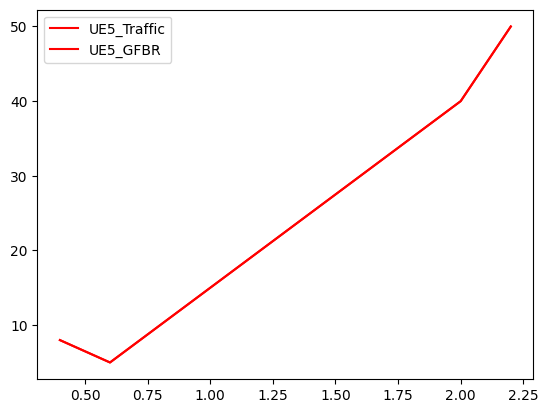

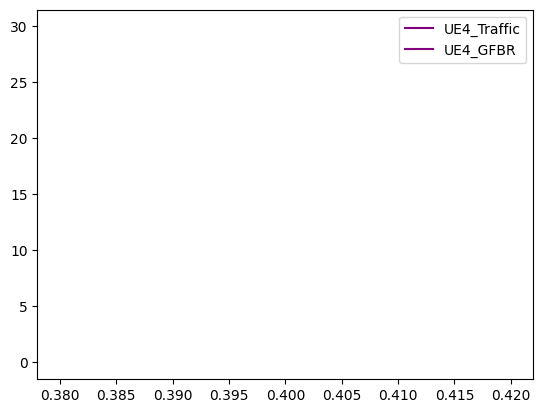

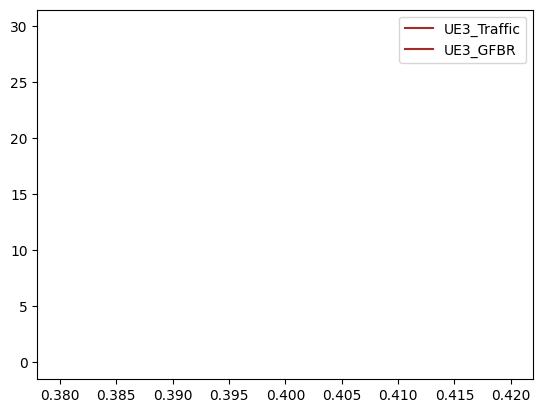

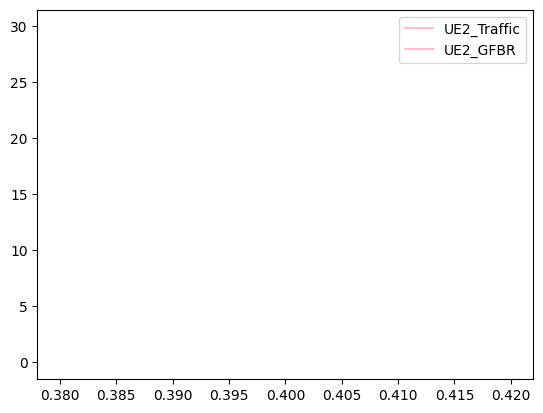

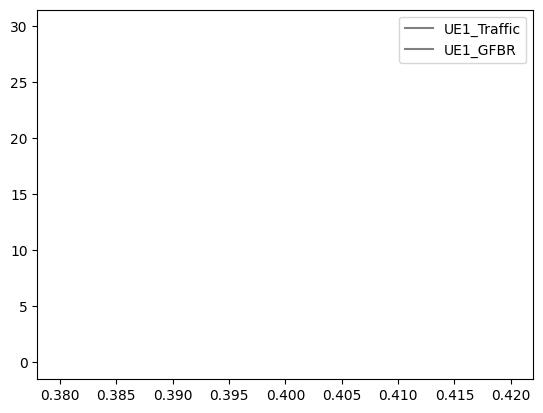

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("debug_updates.csv",sep="\t")
# RNTIS=[1,2,3,4,5,6,7,8]
RNTIS=[8,7,6,5,4,3,2,1]
# RNTIS=[1]
for i, rnti in enumerate(RNTIS):
    df_rnti = df[df["RNTI"] == rnti]
    plt.figure()
    plt.plot(df_rnti["Time(s)"], df_rnti['Traffic(Mbps)'], label=f"UE{rnti}_Traffic", color=colors[i])
    plt.plot(df_rnti["Time(s)"], df_rnti['GFBR(Mbps)'], label=f"UE{rnti}_GFBR", color=colors[i])
    # plt.ylim(0,40)
    plt.legend()
    

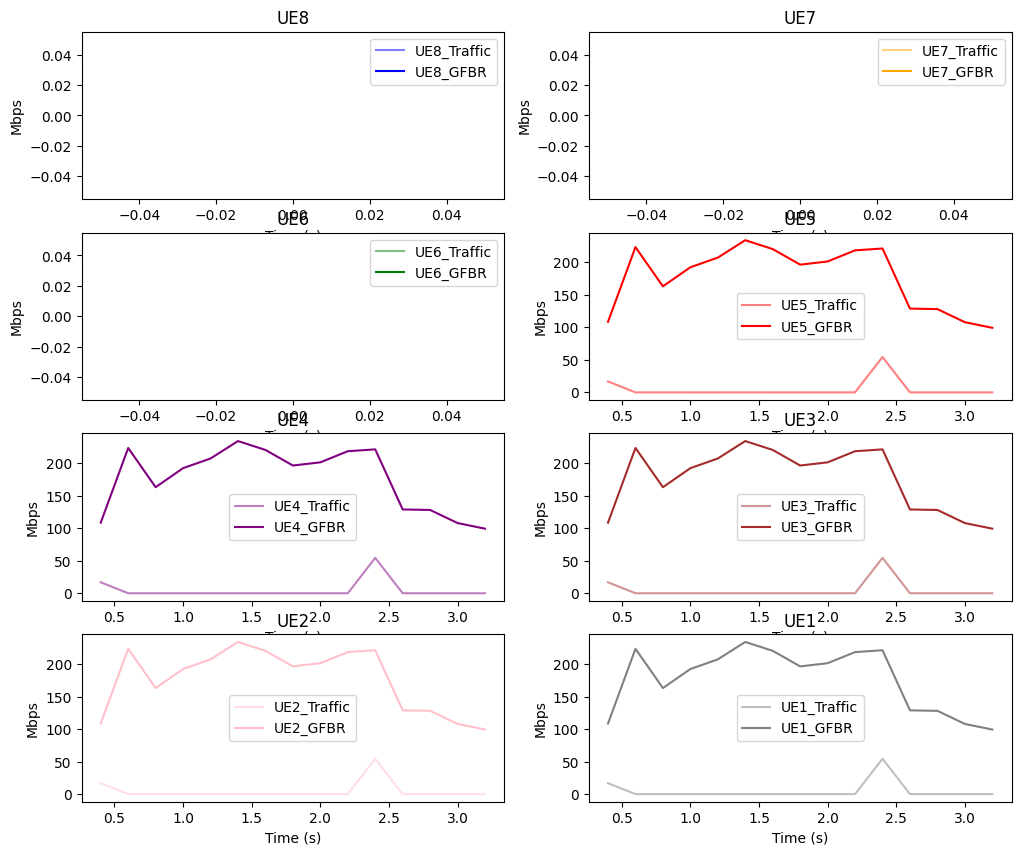

In [19]:

df = pd.read_csv("debug_updates.csv",sep="\t")
# RNTIS=[1,2,3,4,5,6,7,8]
RNTIS=[8,7,6,5,4,3,2,1]
# RNTIS=[1]
fig, ax = plt.subplots(4, 2, figsize=(12, 10))
for i, rnti in enumerate(RNTIS):
    df_rnti = df[df["RNTI"] == rnti]
    ax = ax.flatten()
    ax[i].plot(df_rnti["Time(s)"], df_rnti['Traffic(Mbps)'], label=f"UE{rnti}_Traffic", color=colors[i],alpha=0.5)
    ax[i].plot(df_rnti["Time(s)"], df_rnti['GFBR(Mbps)'], label=f"UE{rnti}_GFBR", color=colors[i])
    ax[i].set_title(f"UE{rnti}")
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Mbps")
    # ax[i].set_ylim(0,40)
    ax[i].legend()